# Création d'un scatter plot (plus) interactif

Nous allons maitenant explorer la librarie [ipywidget](https://ipywidgets.readthedocs.io/en/latest/index.html).
Elle permet la construction d'un interface utilisateur dans les cellules du notebook. Elle peut prendre en charge:
* [La création d'éléments](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)(les *widgets*) comme un bouton ou un slider
* [L'organisation des éléments](https://ipywidgets.readthedocs.io/en/latest/examples/Layout%20Templates.html) dans la cellule d'affichage de Jupyter
* L'expression de lien entres éléments et figure matplotlib pour permettre d'interagire avec ces images.

L'objectif est de fournir ici une introduction à ce module. Nous nous limiterons donc à l'utilisation de la fonction [interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#) pour interagir avec le scatter plot précedent.


In [3]:
import sys

rootDir = "//ifb/data/mydatalocal"
projectDir = rootDir + "/VDBscratch"
libDir = projectDir + "/lib"
dataDir= "/ifb/data/public/teachdata/m2binf_ucbl/data" 

sys.path.append(libDir)

In [ ]:
import pandas, uniprot, go
import numpy as np
from stat_utils import computeORA_BKG
%matplotlib widget

import matplotlib.pyplot as plt

#### Visualisation des abondances et Pathway pour chaque protéine
Nous allons représenter la relation entre l'abondance des protéines (**Log2 Corrected Abundance Ratio**)  et la précision de la mesure (**LOG10 Adj.P-val**). 
###### Creation du scatter plot
[matplotlib.axes.Axes.scatter()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.scatter.html) permet d'intialiser le graphique.
###### Modification continue du scatter plot
Mais cette fonction retourne aussi un objet [PathCollection](https://matplotlib.org/3.1.1/api/collections_api.html) qui permet de modifier à posteriori le rendu des points du scatter plot.
###### Interactivité
Elle sera ici prise en charge par la fonction interact dont le fonctionnement est illustré ci-dessous.



### Exemple de widgets

#### widget simple

In [14]:
import ipywidgets as widgets
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

#### widgets combinés

In [15]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

#### Inférence du widget avec interact
Jupyter construit le widget adapté au paramètre de la fonction interact. Ici un nombre *w* flottant. On va spécifier la modification à apporter à la figure dans le corps de la fonction *update*.

<IPython.core.display.Javascript object>


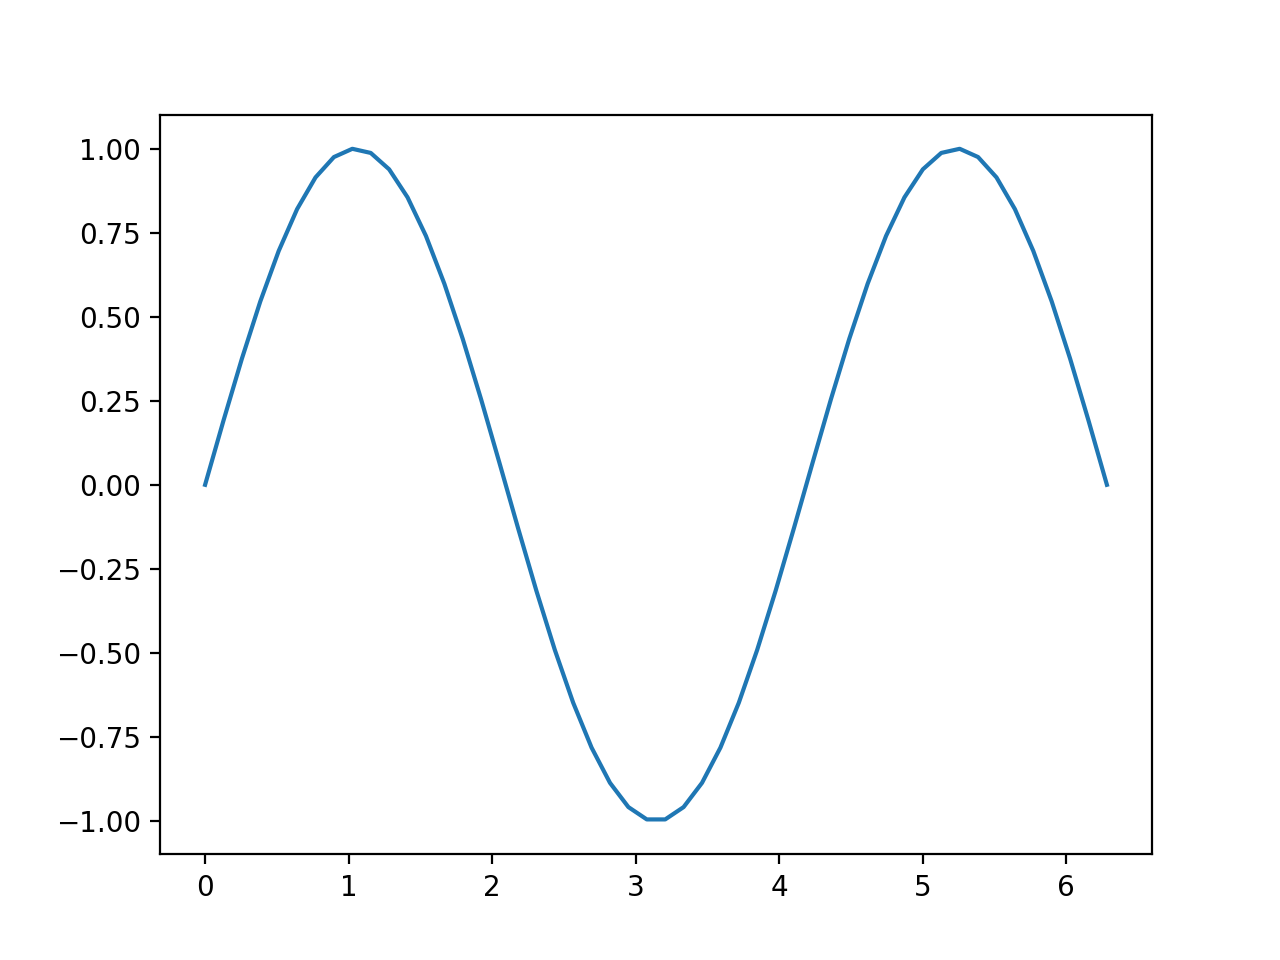

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [17]:
%matplotlib notebook
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);

Jupyter construit le widget adapté au paramètre de la fonction interact. Ici une liste.

<IPython.core.display.Javascript object>


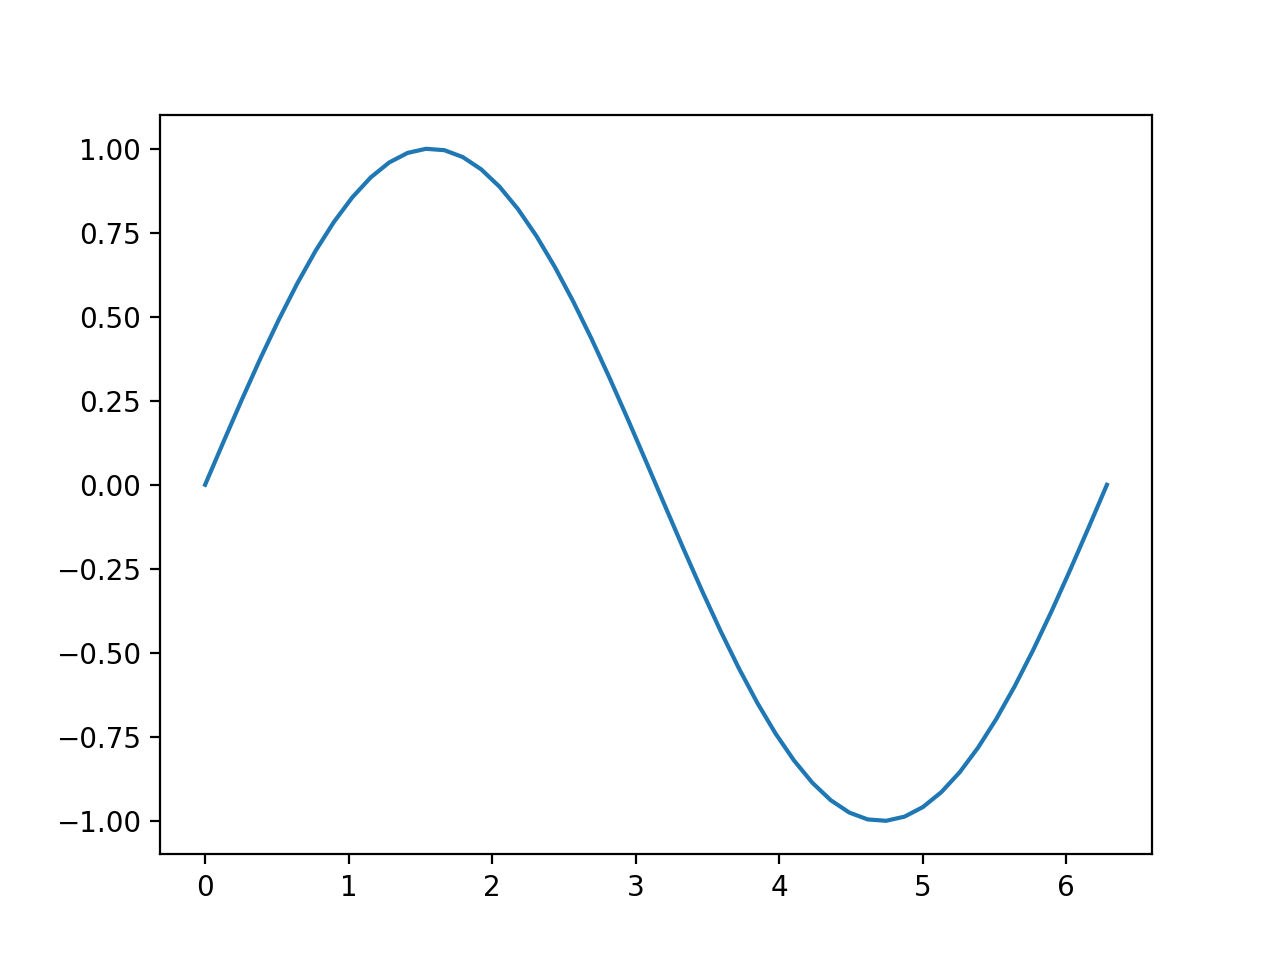

interactive(children=(Dropdown(description='w', options=(1, 3, 6), value=1), Output()), _dom_classes=('widget-…

In [18]:
listDropW = widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

%matplotlib notebook
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

#interact(update);
interact(update, w=[1,3,6]);


## Volcano plot interactif

Nous pouvons desormais construire un volcano plot interactif dans lequel:
* un widget contiendra la liste des pathway
* une interaction avec la liste mettra en évidence les protéines de ce pathway

#### Préparation des données

Réutiliser le travail du **TP3**.

* Lecture des données pandas.
    1. Filtrage des protéines quantifiées
    2. Assignation à chaque protéine des 'Log2 Corrected Abundance Ratio' et 'LOG10 Adj.P-val'
* Lecture de l'ontologie GO.
    1. Lecture des données protéome entier.
    2. Analyse ORA sur l'arbre de termes de votre choix 
    3. Classement des termes GO par pValue croissante
    4. Pour chacun des n termes GO ainsi classé, extraction des protéines de son sous-arbre.

##### Pour chaque proteine on obiendra donc
* *Log2 Corrected Abundance Ratio*
* *LOG10 Adj.P-val*
* [Pathway GO]